In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [2]:
from tokenizers import CharBPETokenizer
bpe = CharBPETokenizer(lowercase=True)
bpe.train(files='sample.txt', min_frequency=1, vocab_size=5000)

def tokenizer(text):
    enc = bpe.encode(text)
    for token in enc.tokens:
        token = token.replace('</w>', '')
        if len(token) > 1:
            yield token

In [27]:
df_original = pd.read_excel("total_25_final.xlsx")

In [26]:
this_month = df_original[(df_original.upload_ym == '2021-09') & (df_original.upload_datetime.dt.day < 21)].reset_index(drop=True)
this_month.shape

(10988, 15)

In [6]:
this_month.head()

,num,region,title,category,time,price,detail,interest,chat,view,upload_datetime,upload_date,upload_ym,reup,region_gu
0,287768851,강남구 도곡동,동원 참치 프리미엄선물세트,생활/가공식품,12일 전,22000,어제 받은 추석선물 입니다!\n참치를 안좋아해서요…\n선물 케이스 그대로 드립니다!...,3,1,199,2021-09-18 23:59:59,2021-09-18,2021-09,0,강남구
1,281245141,강남구 신사동,지갑,남성패션/잡화,28일 전,10000,이탈리아 토스카나 식물성 태닝가죽으로 만든 겁니다.\n느낌 좋아요.\n벨트와 세트로...,2,0,21,2021-09-02 23:59:59,2021-09-02,2021-09,0,강남구
2,280382837,강남구 자곡동,템버린즈 손소독제 세트 선물포장제품,뷰티/미용,끌올 26일 전,18000,27000원에 구매했습니당 저렴하게 팔아요,0,2,46,2021-09-04 23:59:59,2021-09-04,2021-09,1,강남구
3,287481713,강남구 개포동,"CJ특별한선택 A선물세트 (스팸, 카놀라유,올리고당, 맛술)",생활/가공식품,끌올 11일 전,18000,CJ특별한선택 A 선물세트 판매합니다.\n개포동 인근 직거래합니다.,6,3,344,2021-09-19 23:59:59,2021-09-19,2021-09,1,강남구
4,275724725,강남구 대치4동,(새상품)닥스 손수건 2매 풀박스,남성패션/잡화,끌올 20일 전,13000,"브랜드 : 닥스\n소비자가 : 25,000원",7,1,233,2021-09-10 23:59:59,2021-09-10,2021-09,1,강남구


In [29]:
df = this_month[['interest', 'price', 'view']]
df['i/v'] = df.interest / df.view
df

<ipython-input-29-bef2d24bf766>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['i/v'] = df.interest / df.view


,interest,price,view,i/v
0,3,22000,199,0.015075
1,2,10000,21,0.095238
2,0,18000,46,0.000000
3,6,18000,344,0.017442
4,7,13000,233,0.030043
...,...,...,...,...
10983,0,12000,118,0.000000
10984,0,36000,51,0.000000
10985,3,22000,76,0.039474
10986,0,37000,352,0.000000


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
clustering_sc = sc.fit_transform(df)

kmeans = KMeans(n_clusters=5, random_state =0)
clusters = kmeans.fit(clustering_sc)
df["cluster"] = clusters.labels_
print(df["cluster"].unique())
df.head()

[0 2 1 3 4]


<ipython-input-8-79908a093a98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = clusters.labels_


,interest,price,view,cluster
0,3,22000,199,0
1,2,10000,21,0
2,0,18000,46,0
3,6,18000,344,2
4,7,13000,233,2


In [9]:
df.groupby('cluster').count()

,interest,price,view
cluster,,,
0,7585,7585,7585
1,562,562,562
2,2792,2792,2792
3,15,15,15
4,34,34,34


In [10]:
df.groupby('cluster').mean()

,interest,price,view
cluster,,,
0,1.373500,3.022488e+04,126.202241
1,15.106762,6.407373e+04,748.665480
2,5.848854,4.371709e+04,330.896490
3,14.666667,5.618667e+06,799.733333
4,40.970588,5.161029e+05,2183.941176


In [11]:
from sklearn.decomposition import PCA
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df['cluster']

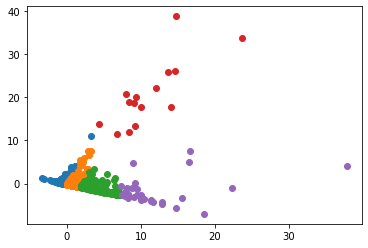

In [12]:
import matplotlib.pyplot as plt
for i in df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0], tmp[1])

In [13]:
df = pd.concat([df, this_month], axis=1)
df

,interest,price,view,cluster,num,region,title,category,time,price,detail,interest,chat,view,upload_datetime,upload_date,upload_ym,reup,region_gu
0,3,22000,199,0,287768851,강남구 도곡동,동원 참치 프리미엄선물세트,생활/가공식품,12일 전,22000,어제 받은 추석선물 입니다!\n참치를 안좋아해서요…\n선물 케이스 그대로 드립니다!...,3,1,199,2021-09-18 23:59:59,2021-09-18,2021-09,0,강남구
1,2,10000,21,0,281245141,강남구 신사동,지갑,남성패션/잡화,28일 전,10000,이탈리아 토스카나 식물성 태닝가죽으로 만든 겁니다.\n느낌 좋아요.\n벨트와 세트로...,2,0,21,2021-09-02 23:59:59,2021-09-02,2021-09,0,강남구
2,0,18000,46,0,280382837,강남구 자곡동,템버린즈 손소독제 세트 선물포장제품,뷰티/미용,끌올 26일 전,18000,27000원에 구매했습니당 저렴하게 팔아요,0,2,46,2021-09-04 23:59:59,2021-09-04,2021-09,1,강남구
3,6,18000,344,2,287481713,강남구 개포동,"CJ특별한선택 A선물세트 (스팸, 카놀라유,올리고당, 맛술)",생활/가공식품,끌올 11일 전,18000,CJ특별한선택 A 선물세트 판매합니다.\n개포동 인근 직거래합니다.,6,3,344,2021-09-19 23:59:59,2021-09-19,2021-09,1,강남구
4,7,13000,233,2,275724725,강남구 대치4동,(새상품)닥스 손수건 2매 풀박스,남성패션/잡화,끌올 20일 전,13000,"브랜드 : 닥스\n소비자가 : 25,000원",7,1,233,2021-09-10 23:59:59,2021-09-10,2021-09,1,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,0,12000,118,0,285902972,중랑구 망우본동,샘표 선물세트,생활/가공식품,17일 전,12000,유통기한 사진에 있습니다~,0,1,118,2021-09-13 23:01:15,2021-09-13,2021-09,0,중랑구
10984,0,36000,51,0,239898694,중랑구 상봉동,향초&컵세트(새상품),생활/가공식품,끌올 15일 전,36000,향초&컵세트(새상품),0,0,51,2021-09-15 23:01:15,2021-09-15,2021-09,1,중랑구
10985,3,22000,76,0,282388971,중랑구 묵제1동,박이추 커피공장 보헤미안 커피 유나이트 로스터리 선물세트. 미개봉. 원두커피 유나이티드,생활/가공식품,끌올 23일 전,22000,미개봉 새제품\n[한박스 구성]\n1. 하우스블렌드 150g (브라질 콜롬비아 과테...,3,1,76,2021-09-07 23:01:15,2021-09-07,2021-09,1,중랑구
10986,0,37000,352,0,288556876,중랑구 묵동,추석 선물 세트,생활/가공식품,10일 전,37000,1. 롯데 프리미엄 nh3호 만 하는경우(빨간박스)\n:2만원,0,0,352,2021-09-20 23:01:15,2021-09-20,2021-09,0,중랑구


In [14]:
df_cluster = df[['interest', 'price', 'view', 'cluster', 'region', 'title']]

In [15]:
df_cluster[df_cluster.cluster == 0]

,interest,interest,price,price,view,view,cluster,region,title
0,3,3,22000,22000,199,199,0,강남구 도곡동,동원 참치 프리미엄선물세트
1,2,2,10000,10000,21,21,0,강남구 신사동,지갑
2,0,0,18000,18000,46,46,0,강남구 자곡동,템버린즈 손소독제 세트 선물포장제품
5,1,1,13000,13000,103,103,0,강남구 논현동,선물용 고급 포도씨유세트 2병
7,1,1,40000,40000,88,88,0,강남구 대치2동,배 선물세트
...,...,...,...,...,...,...,...,...,...
10983,0,0,12000,12000,118,118,0,중랑구 망우본동,샘표 선물세트
10984,0,0,36000,36000,51,51,0,중랑구 상봉동,향초&컵세트(새상품)
10985,3,3,22000,22000,76,76,0,중랑구 묵제1동,박이추 커피공장 보헤미안 커피 유나이트 로스터리 선물세트. 미개봉. 원두커피 유나이티드
10986,0,0,37000,37000,352,352,0,중랑구 묵동,추석 선물 세트


In [16]:
# 군집화 0번 : 목걸이, 그릇, 커피, 포트메리온, 커피잔, 도자기 
cv = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm = cv.fit_transform(df_cluster[df_cluster.cluster == 0].title)

wc = pd.DataFrame({'단어': cv.get_feature_names(), '빈도':dtm.sum(axis=0).flat})
wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
158,선물세트,3139
167,세트,1356
151,새상품,932
180,스팸,663
124,미개봉,519
152,새제품,416
239,추석,414
267,팝니다,401
241,추석선물세트,393
53,cj,335


In [17]:
# 군집화 1번 
cv1 = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm1 = cv1.fit_transform(df_cluster[df_cluster.cluster == 1].title)

wc1 = pd.DataFrame({'단어': cv1.get_feature_names(), '빈도':dtm1.sum(axis=0).flat})
wc1.sort_values('빈도', ascending=False).head(30)

,단어,빈도
145,선물세트,174
138,새상품,136
152,세트,125
139,새제품,51
167,스팸,33
109,미개봉,24
142,선물,22
248,추석,22
270,판매합니다,21
250,추석선물세트,19


In [18]:
# 군집화 2번 
cv2 = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm2 = cv2.fit_transform(df_cluster[df_cluster.cluster == 2].title)

wc2 = pd.DataFrame({'단어': cv2.get_feature_names(), '빈도':dtm2.sum(axis=0).flat})
wc2.sort_values('빈도', ascending=False).head(30)

,단어,빈도
155,선물세트,1185
163,세트,556
149,새상품,470
178,스팸,246
234,추석,181
150,새제품,179
124,미개봉,175
265,팝니다,149
153,선물,143
236,추석선물세트,136


In [19]:
# 군집화 3번 : 일반적인 선물세트 
cv3 = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm3 = cv3.fit_transform(df_cluster[df_cluster.cluster == 3].title)

wc3 = pd.DataFrame({'단어': cv3.get_feature_names(), '빈도':dtm3.sum(axis=0).flat})
wc3.sort_values('빈도', ascending=False).head(30)

,단어,빈도
14,보이백,8
19,샤넬,7
18,새상품,6
5,금장,4
23,에르메스,3
17,빈티지,3
38,핸들,2
4,가든,2
1,36,2
9,미개봉,2


In [20]:
# 군집화 4번 : 명품, 보석 등 
cv4 = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm4 = cv4.fit_transform(df_cluster[df_cluster.cluster == 4].title)

wc4 = pd.DataFrame({'단어': cv4.get_feature_names(), '빈도':dtm4.sum(axis=0).flat})
wc4.sort_values('빈도', ascending=False).head(30)

,단어,빈도
60,새상품,11
66,세트,8
65,선물세트,4
61,새제품,3
57,비비,3
109,핑크,3
107,풀세트,3
47,목걸이,3
75,아이언,2
91,캠핑,2
